In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#load data
df_beers_BA = pd.read_csv('./BeerAdvocate/beers.csv')
# df_reviews_BA = pd.read_csv('./BeerAdvocate/ratings.txt/ratings.txt', sep='\t')

df_beers_RB = pd.read_csv('./RateBeer/beers.csv')
# df_breweries_RB = pd.read_csv('./RateBeer/breweries.csv')
# df_users_RB = pd.read_csv('./RateBeer/users.csv')

  


In [3]:
# #convert txt to csv by keeping only the columns we need
# # Takes a few minutes to run !!!
# # Define file paths and column names
# input_file_path = './RateBeer/ratings.txt/ratings.txt'
# output_file_path = './RateBeer/ratings.csv'
# columns = [
#     'beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date',
#     'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 
#     'overall', 'rating'
# ]  # "text" and "review" are excluded

# # Custom function to parse each entry as a dictionary, ignoring "text" and "review"
# def parse_entry(lines):
#     entry = {}
#     for line in lines:
#         if ': ' in line:
#             key, value = line.split(': ', 1)
#             if key not in ['text', 'review']:  # Skip "text" and "review" columns
#                 entry[key] = value.strip()
#     return entry

# # Initialize list to store parsed data (process in chunks to avoid memory issues)
# data = []
# entry_lines = []

# # Open the file and process each line
# with open(input_file_path, 'r', encoding='utf-8') as file:
#     for line in file:
#         if line.strip():  # Collect lines for one entry
#             entry_lines.append(line.strip())
#         else:
#             if entry_lines:  # Parse the collected lines and reset for the next entry
#                 data.append(parse_entry(entry_lines))
#                 entry_lines = []
#     # Parse the last entry if the file doesn't end with a blank line
#     if entry_lines:
#         data.append(parse_entry(entry_lines))

# # Convert to DataFrame directly from the parsed data
# df = pd.DataFrame(data, columns=columns)

# # Save the DataFrame to a CSV file without the discarded columns
# df.to_csv(output_file_path, index=False, encoding='utf-8')

# # Confirm file saved successfully
# print(f"Data saved to {output_file_path}")


In [4]:
df_ratings_BA = pd.read_csv('./BeerAdvocate/ratings.csv')
print(df_ratings_BA.head())

df_ratings_RB = pd.read_csv('./RateBeer/ratings.csv')
print(df_ratings_RB.head())

       beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  1440064800          nmann08   
1       10093  English Pale Ale  4.5  1235127600      StJamesGate   
2       10093  English Pale Ale  4.5  1142247600          mdagnew   
3       10093  English Pale Ale  4.5  1101898800  helloloser12345   
4       10093  English Pale Ale  4.5  1093860000       cypressbob   

                 user_id  appearance  aroma  palate  taste  overall  rating  
0         nmann08.184925        3.25   2.75    3.25   2.75      3.0    2.8

In [5]:
#convert date to datetime, keep only days
df_ratings_BA['date'] = pd.to_datetime(df_ratings_BA['date'], origin='unix', unit='s').dt.date
df_ratings_RB['date'] = pd.to_datetime(df_ratings_RB['date'], origin='unix', unit='s').dt.date

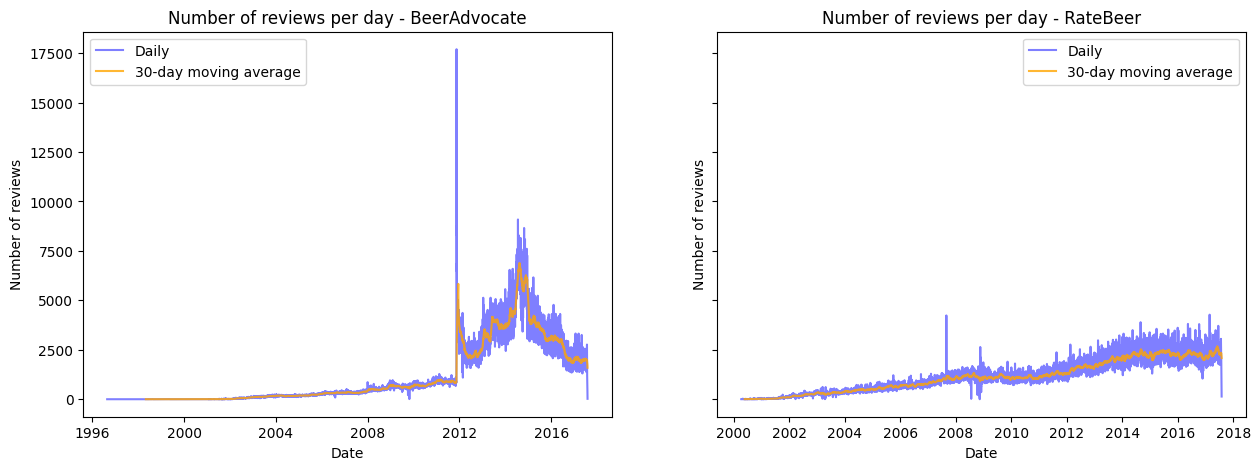

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#number of reviews per day
daily_count_BA = df_ratings_BA['date'].value_counts().sort_index()
#add 30 days moving average to smooth the curve
rolling_avg_BA = daily_count_BA.rolling(window=30).mean()

daily_count_RB = df_ratings_RB['date'].value_counts().sort_index()
rolling_avg_RB = daily_count_RB.rolling(window=30).mean()

axes[0].plot(daily_count_BA, alpha=0.5, label='Daily', color='blue')
axes[0].plot(rolling_avg_BA, alpha=0.8, label='30-day moving average', color='orange')
axes[0].set_title('Number of reviews per day - BeerAdvocate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of reviews')
axes[0].legend()

axes[1].plot(daily_count_RB, alpha=0.5, label='Daily', color='blue')
axes[1].plot(rolling_avg_RB, alpha=0.8, label='30-day moving average', color='orange')
axes[1].set_title('Number of reviews per day - RateBeer')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of reviews')
axes[1].legend()

plt.show()

In [7]:
#let's investigate the peak in Beeadvocate
df_ratings_BA['date'].value_counts().sort_values(ascending=False).head(10)

date
2011-11-15    17696
2011-11-14    17131
2011-11-16     9593
2014-07-20     9088
2011-11-18     8770
2014-10-26     8658
2011-11-17     8292
2014-08-03     8282
2014-09-01     8153
2014-11-09     8085
Name: count, dtype: int64

In [8]:
#the peak comes five days : 2011-11-14, 2011-11-15, 2011-11-16, 2011-11-17, 2011-11-18
#randomly remove reviews from these days to have max 4000 reviews per day
#remove 500 reviews per day
max = 5000
for i in range(30):
    number = (df_ratings_BA['date'] == pd.to_datetime(f"2011-11-{i+1}").date()).sum()
    # print(number)
    if number > max:
        df_ratings_BA = df_ratings_BA.drop(df_ratings_BA[df_ratings_BA['date'] == pd.to_datetime(f"2011-11-{i+1}").date()].sample(number-max).index)

#check the peak is removed
df_ratings_BA['date'].value_counts().sort_values(ascending=False).head(10)


date
2014-07-20    9088
2014-10-26    8658
2014-08-03    8282
2014-09-01    8153
2014-11-09    8085
2014-10-28    8018
2014-07-27    7732
2014-07-19    7698
2014-08-10    7649
2014-07-13    7609
Name: count, dtype: int64

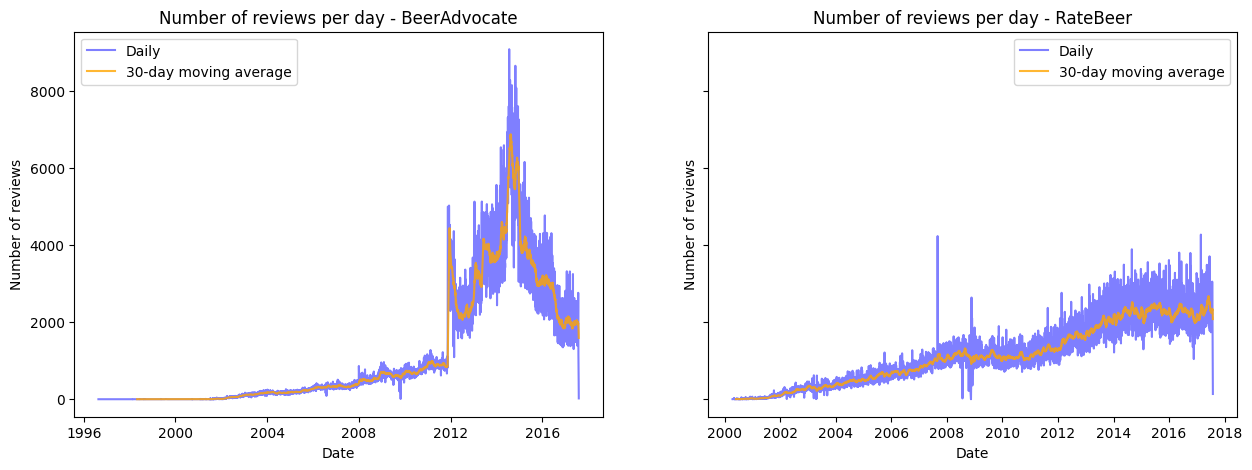

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#number of reviews per day
daily_count_BA = df_ratings_BA['date'].value_counts().sort_index()
#add 30 days moving average to smooth the curve
rolling_avg_BA = daily_count_BA.rolling(window=30).mean()

daily_count_RB = df_ratings_RB['date'].value_counts().sort_index()
rolling_avg_RB = daily_count_RB.rolling(window=30).mean()

axes[0].plot(daily_count_BA, alpha=0.5, label='Daily', color='blue')
axes[0].plot(rolling_avg_BA, alpha=0.8, label='30-day moving average', color='orange')
axes[0].set_title('Number of reviews per day - BeerAdvocate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of reviews')
axes[0].legend()

axes[1].plot(daily_count_RB, alpha=0.5, label='Daily', color='blue')
axes[1].plot(rolling_avg_RB, alpha=0.8, label='30-day moving average', color='orange')
axes[1].set_title('Number of reviews per day - RateBeer')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of reviews')
axes[1].legend()

plt.show()

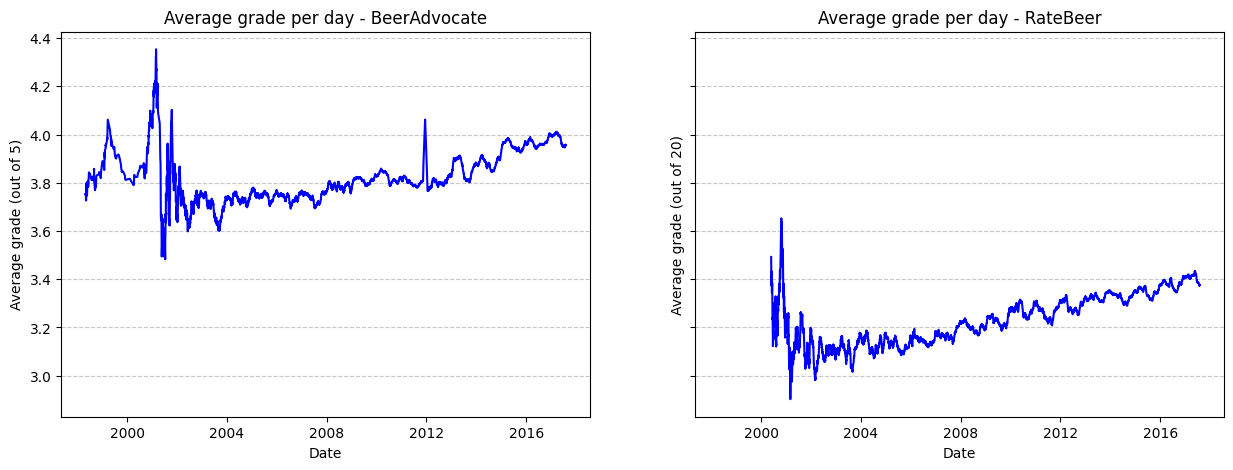

In [10]:
#look at the evolution of the average grade over time
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

#use moving average to smooth the curve
average_grade_BA = df_ratings_BA.groupby('date')['rating'].mean().rolling(window=30).mean()
average_grade_RB = df_ratings_RB.groupby('date')['rating'].mean().rolling(window=30).mean()

axes[0].plot(average_grade_BA, color='blue')
axes[0].set_title('Average grade per day - BeerAdvocate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average grade (out of 5)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].plot(average_grade_RB, color='blue')
axes[1].set_title('Average grade per day - RateBeer')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average grade (out of 20)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

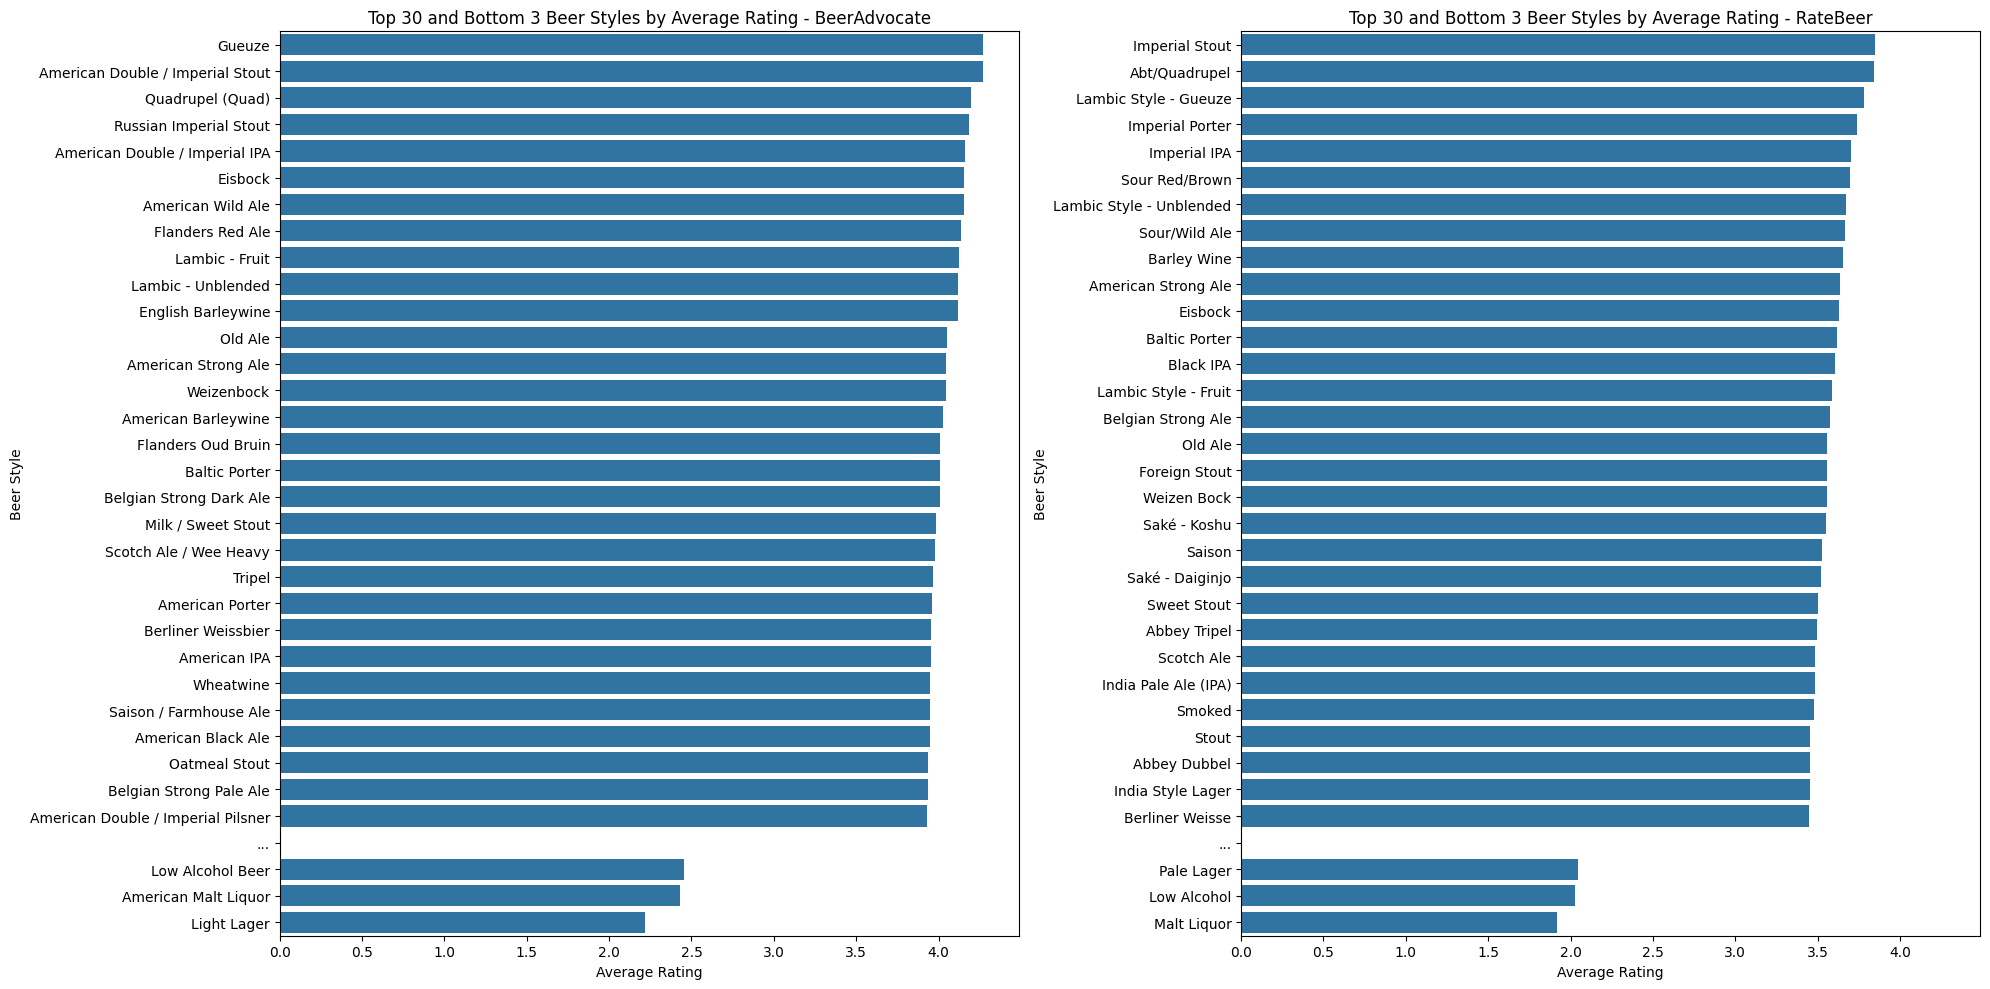

In [11]:
# Calculate average ratings per style
avg_ratings_BA = df_ratings_BA.groupby('style')['rating'].mean().sort_values()
avg_ratings_RB = df_ratings_RB.groupby('style')['rating'].mean().sort_values()

# Select top 30 and bottom 3 beer styles
combined_styles_BA = pd.concat([avg_ratings_BA.head(3), pd.Series([np.nan], index=["..."]), avg_ratings_BA.tail(30)])
combined_styles_RB = pd.concat([avg_ratings_RB.head(3), pd.Series([np.nan], index=["..."]), avg_ratings_RB.tail(30)])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

sns.barplot(x=combined_styles_BA.values, y=combined_styles_BA.index, ax=axes[0])
axes[0].set_title('Top 30 and Bottom 3 Beer Styles by Average Rating - BeerAdvocate')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Beer Style')
axes[0].invert_yaxis() 

sns.barplot(x=combined_styles_RB.values, y=combined_styles_RB.index, ax=axes[1])
axes[1].set_title('Top 30 and Bottom 3 Beer Styles by Average Rating - RateBeer')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Beer Style')
axes[1].invert_yaxis() 

plt.tight_layout()
plt.show()


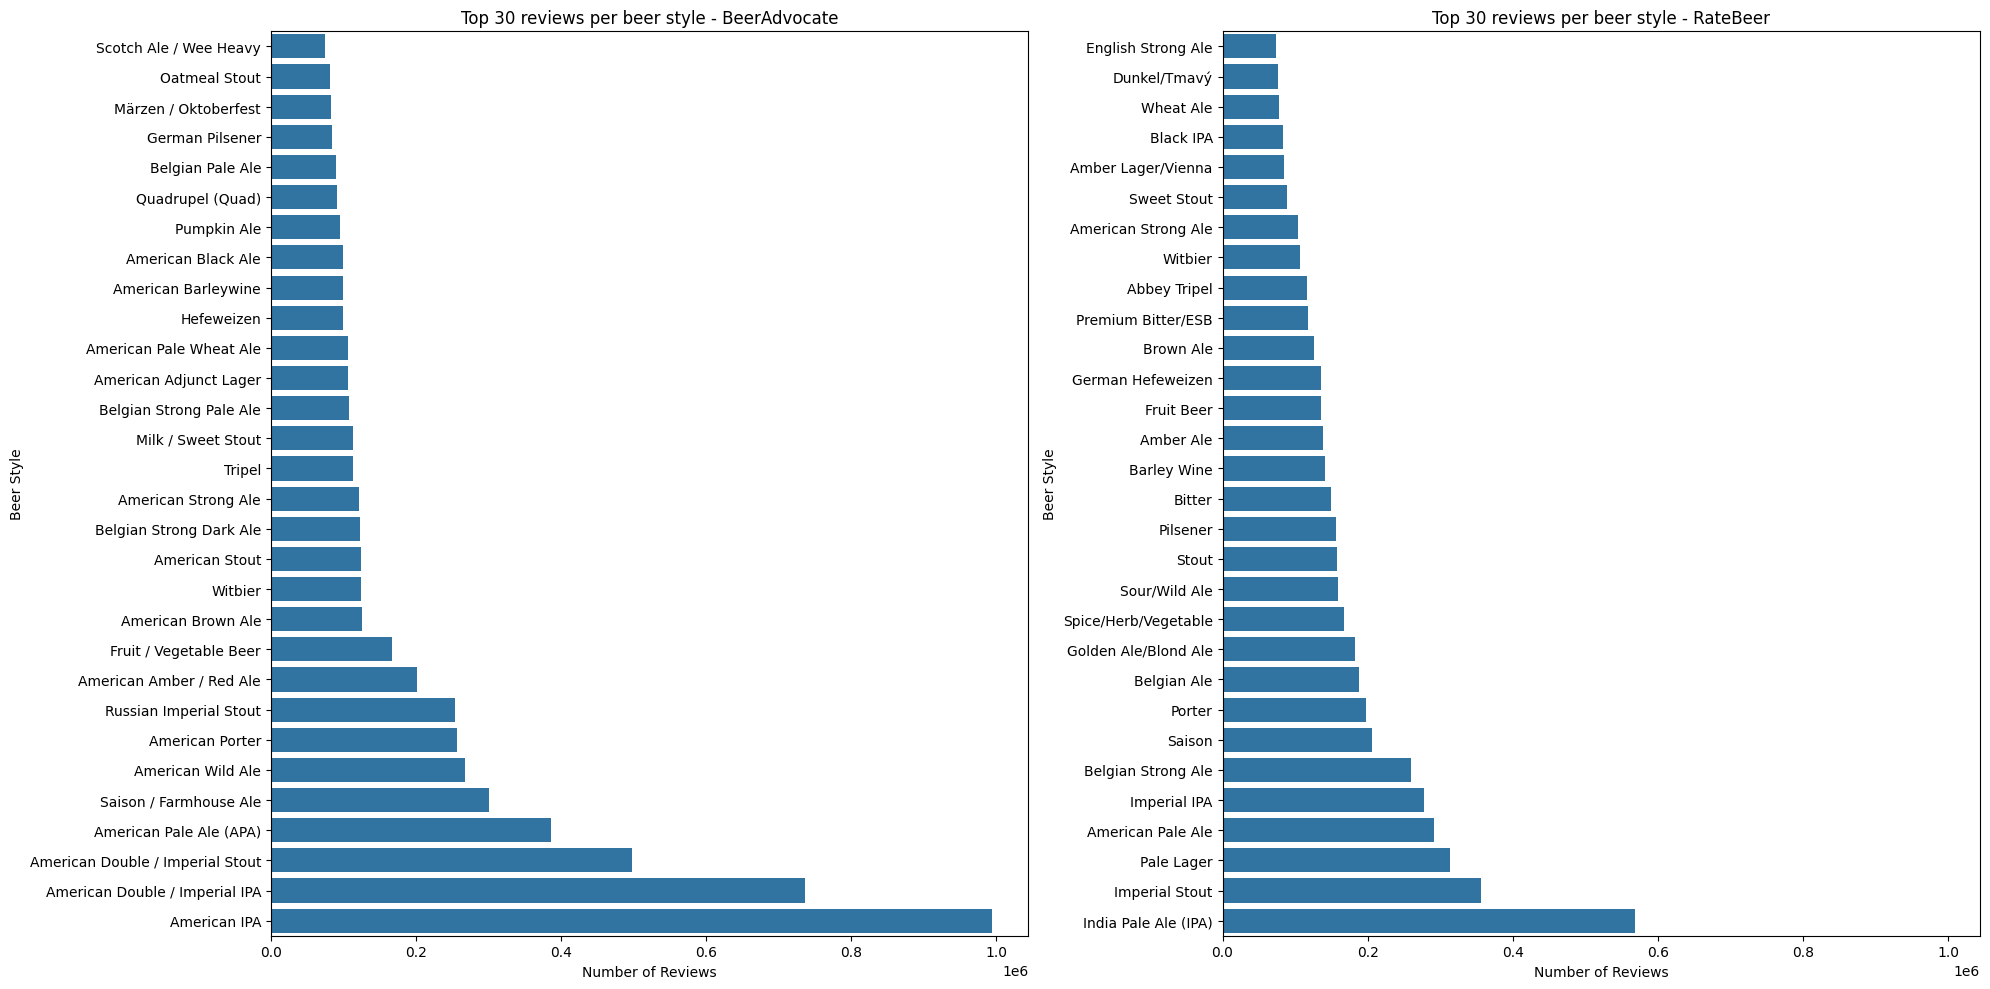

In [12]:
#plot the number of reviews per style
number_of_reviews_per_style_BA = df_ratings_BA['style'].value_counts().head(30)
number_of_reviews_per_style_RB = df_ratings_RB['style'].value_counts().head(30)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

sns.barplot(x=number_of_reviews_per_style_BA.values, y=number_of_reviews_per_style_BA.index, ax=axes[0])
axes[0].set_title('Top 30 reviews per beer style - BeerAdvocate')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Beer Style')
axes[0].invert_yaxis() 

sns.barplot(x=number_of_reviews_per_style_RB.values, y=number_of_reviews_per_style_RB.index, ax=axes[1])
axes[1].set_title('Top 30 reviews per beer style - RateBeer')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Beer Style')
axes[1].invert_yaxis() 

plt.tight_layout()
plt.show()

In [13]:
#create a seasonal dataframe by keeping only the month and day
df_ratings_BA['date'] = pd.to_datetime(df_ratings_BA['date'])
df_ratings_BA['month_day'] = df_ratings_BA['date'].dt.strftime('%m-%d')

df_ratings_RB['date'] = pd.to_datetime(df_ratings_RB['date'])
df_ratings_RB['month_day'] = df_ratings_RB['date'].dt.strftime('%m-%d')

In [14]:
#normalize the number of ratings for each year
df_ratings_BA['year'] = df_ratings_BA['date'].dt.year
df_ratings_RB['year'] = df_ratings_RB['date'].dt.year

# Calculate the number of ratings per day of the year
ratings_per_day_BA = df_ratings_BA.groupby('month_day')['rating'].count()
ratings_per_day_RB = df_ratings_RB.groupby('month_day')['rating'].count()

# Normalize the number of ratings per day of the year
ratings_per_day_BA = ratings_per_day_BA.groupby('month_day').transform(lambda x: (x - x.min()) / (x.max() - x.min()))
ratings_per_day_RB = ratings_per_day_RB.groupby('month_day').transform(lambda x: (x - x.min()) / (x.max() - x.min()))




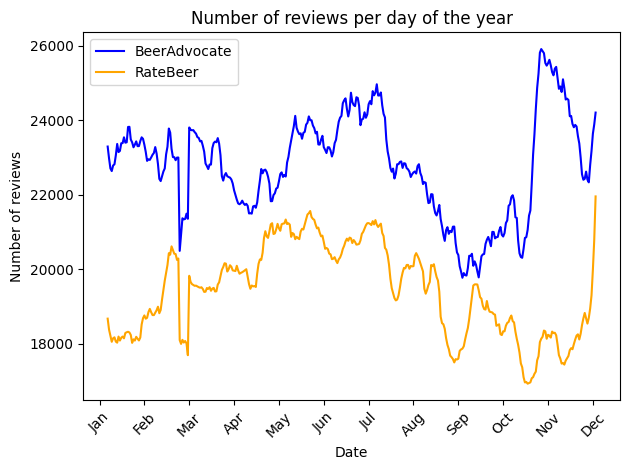

In [15]:
# plot the number of reviews per day of the year with a 7-day moving average
number_of_reviews_per_day_BA = df_ratings_BA['month_day'].value_counts().sort_index().rolling(window=7).mean() 
number_of_reviews_per_day_RB = df_ratings_RB['month_day'].value_counts().sort_index().rolling(window=7).mean()

plt.plot(number_of_reviews_per_day_BA, label='BeerAdvocate', color='blue')
plt.plot(number_of_reviews_per_day_RB, label='RateBeer', color='orange')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(number_of_reviews_per_day_BA), int(len(number_of_reviews_per_day_BA) / 11)), 
           labels=months)
plt.xticks(rotation=45)

plt.title('Number of reviews per day of the year')
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
#Look only at the top styles
top_styles_BA = df_ratings_BA.groupby('style')['rating'].mean().sort_values().tail(5)
top_styles_RB = df_ratings_RB.groupby('style')['rating'].mean().sort_values().tail(5)


style
American Double / Imperial IPA      4.162467
Russian Imperial Stout              4.187194
Quadrupel (Quad)                    4.196928
American Double / Imperial Stout    4.267940
Gueuze                              4.272871
Name: rating, dtype: float64


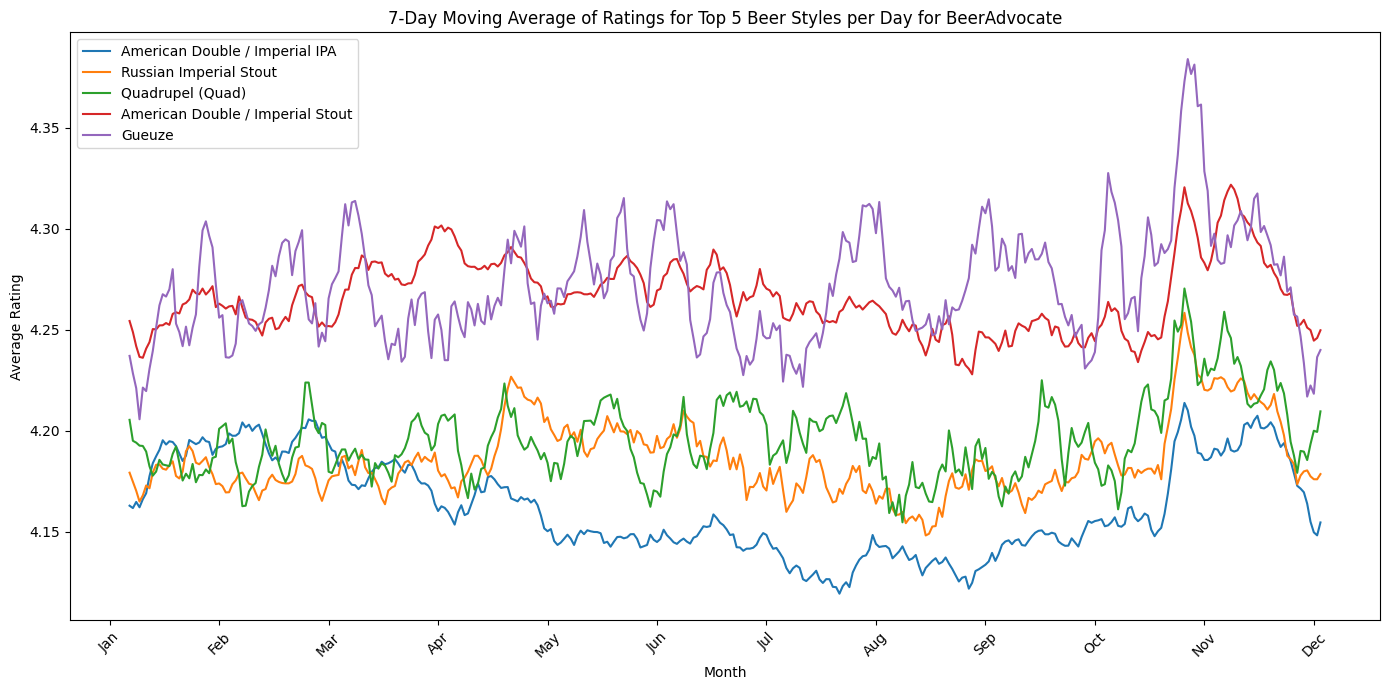

In [17]:
df_ratings_BA_top = df_ratings_BA[df_ratings_BA['style'].isin(top_styles_BA.index)]
average_ratings_per_day_BA = df_ratings_BA_top.groupby(['style', 'month_day'])['rating'].mean().unstack('style')
rolling_avg_BA_top = average_ratings_per_day_BA.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
for style in top_styles_BA.index:
    plt.plot(rolling_avg_BA_top.index, rolling_avg_BA_top[style], label=style)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(rolling_avg_BA_top), int(len(rolling_avg_BA_top) / 11)), labels=months)
plt.xticks(rotation=45)

plt.title('7-Day Moving Average of Ratings for Top 5 Beer Styles per Day for BeerAdvocate')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.legend()

plt.tight_layout()
plt.show()

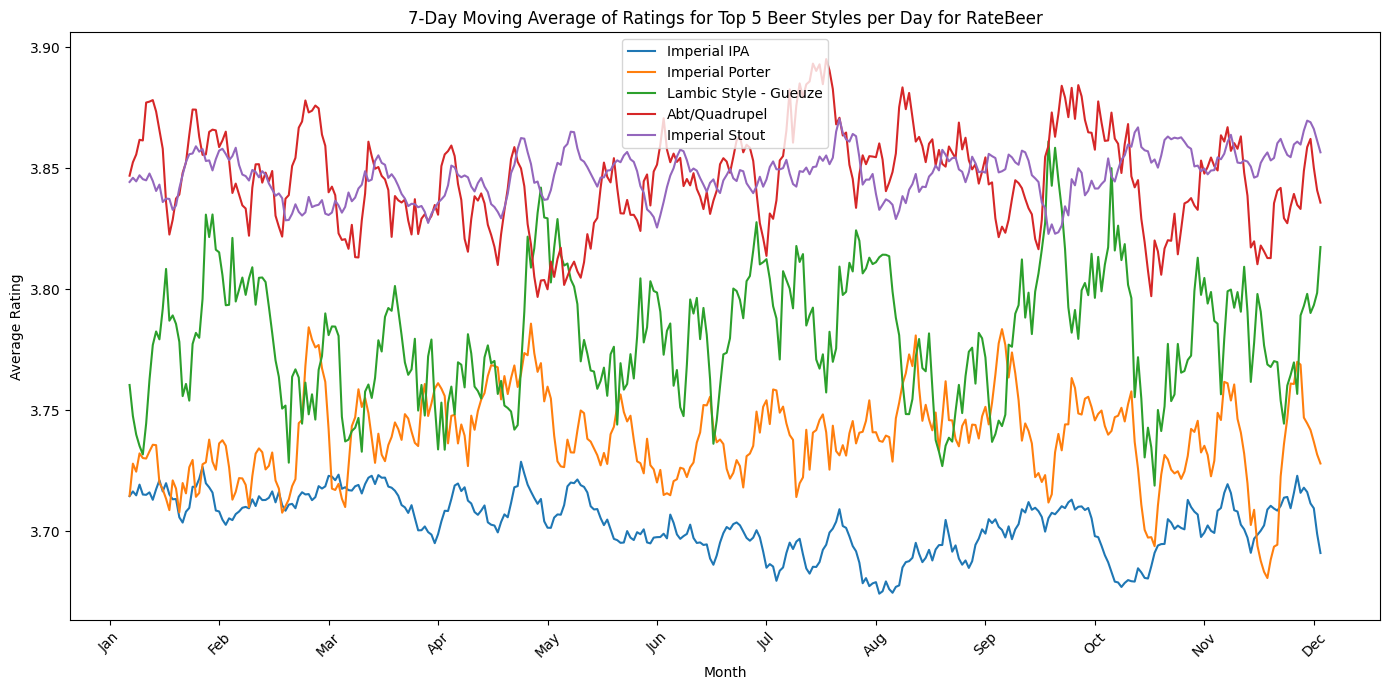

In [18]:
df_ratings_RB_top = df_ratings_RB[df_ratings_RB['style'].isin(top_styles_RB.index)]
average_ratings_per_day_RB = df_ratings_RB_top.groupby(['style', 'month_day'])['rating'].mean().unstack('style')
rolling_avg_RB_top = average_ratings_per_day_RB.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
for style in top_styles_RB.index:
    plt.plot(rolling_avg_RB_top.index, rolling_avg_RB_top[style], label=style)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(rolling_avg_RB_top), int(len(rolling_avg_RB_top) / 11)), labels=months)
plt.xticks(rotation=45)

plt.title('7-Day Moving Average of Ratings for Top 5 Beer Styles per Day for RateBeer')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.legend()

plt.tight_layout()
plt.show()

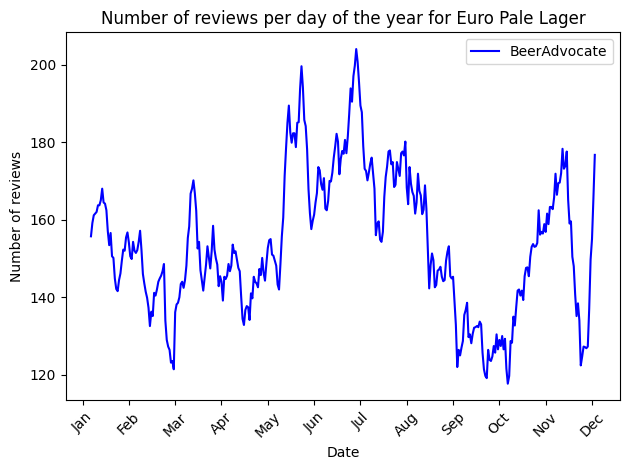

In [32]:
#plot the number of ratings per day of the year for a specific style
style = 'Euro Pale Lager'

ratings_per_day_BA = df_ratings_BA[df_ratings_BA['style'] == style].groupby('month_day')['rating'].count()
#7-day moving average
ratings_per_day_BA = ratings_per_day_BA.rolling(window=7).mean()

plt.plot(ratings_per_day_BA, label='BeerAdvocate', color='blue')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(ratings_per_day_BA), int(len(ratings_per_day_BA) / 11)), labels=months)
plt.xticks(rotation=45)

plt.title(f'Number of reviews per day of the year for {style}')
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.legend()

plt.tight_layout()
plt.show()
